# Project: Investigate a Dataset (TMDB 5000 Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> **Questions**
>><ul> 
    <li>Q1:Which genres are most popular from year to year</li>
    <li>Q2:What kinds of properties are associated with movies that have high revenues(prperties:Budget,Voting)</li>
    </ul>
 

In [2]:
#  all of the packages i plan to use
import pandas as pd
import numpy as nb
import matplotlib.pyplot as plt

from pandas import Series, DataFrame



<a id='wrangling'></a>
## Data Wrangling

> Load Movie Database (TMDb)

> Assess Data(data types,null values)

### General Properties

In [17]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('tmdb-movies.csv')
df.head(3)
#   number of rows and columns
df.shape

(10866, 21)

In [18]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [19]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [20]:
# missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [111]:
#  explore data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [21]:
# convert release date from string ro date
df.release_date=pd.to_datetime(df.release_date) 
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

### Data Cleaning ( )

> we emphasis on genre and popularity,budget,revenue which are relevant to questions

In [22]:
#Datafram df_Q1 for Question 1
df_Q1=df 
#Datafram  df_Q2 for Question2 
df_Q2=df

In [23]:
df_Q2.shape

(10866, 21)

In [24]:
# drop null values in genres 
df_Q1.genres.dropna(inplace=True)


In [25]:
## delete rows with 0 
df_Q1.query('popularity==0').size 

0

In [26]:
#  duplicated movie titles
df_Q1.original_title.duplicated().sum()

295

In [27]:
# delete duplicated movie titles
df_Q1.original_title.drop_duplicates(keep='first',inplace=True)
df_Q1.original_title.duplicated().sum()

0

<font color=red size=3>split genres to multi columns <font>

In [28]:
s = df_Q1['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del df_Q1['genres']
dt=df_Q1.join(s)
dt.head(20)
 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Adventure
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Science Fiction
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Thriller
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Science Fiction


<font color=red size=5>Data cleaning relevant to Question 2</font>


In [29]:
df_Q2.shape

(10866, 20)

In [35]:
# explor movies without revenue
df_Q2[df_Q2['revenue']==0].shape

(6016, 20)

In [36]:
# for qustion 2 i have to delete All Rows with revenue =0 
df_Q2.drop(df_Q2[df_Q2['revenue']==0].index,inplace=True)
df_Q2.query('revenue ==0').size

0

In [37]:
# explor movie without Budjet
df_Q2.query('budget_adj==0').size

19900

In [38]:
# delete all rows with budget 0
df_Q2.drop(df_Q2[df_Q2['budget_adj']==0].index,inplace=True)
df_Q2.shape # my sample is 3855 from 10866

(3855, 20)

<a id='eda'></a>
## Exploratory Data Analysis

> **Q1**: I have to divide years to Decades and make slice for each Decade to analyse big data 
> **Q2**: To analyse movies with highest popularity i took  most 300 popular movie

### Research Question 1 (Q1:Which genres are most popular from year to year)

In [39]:
# Divid years to decade to facilitate data analysing
#   
def decade(x):
    if ((x>= 1960) and (x<1970)): x= "Decade 60_70"
    elif((x>=1970) and (x<1980)): x="Decade 70_80"
    elif((x>=1980) and (x<1990)): x="Decade 80_90"
    elif((x>=1990) and (x<2000)): x="Decade 90_2000"
    elif((x>=2000) and (x<2010)): x="Decade 2000_2010"
    else: x="from 2010 until 2014"
    return x;
        
dt['Decade']=dt['release_year'].apply(lambda x : decade(x))
dt.head(5)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres,Decade
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,from 2010 until 2014
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure,from 2010 until 2014
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction,from 2010 until 2014
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller,from 2010 until 2014
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,from 2010 until 2014


In [40]:
# calculate the average of popularity for each movie kindes and Decades
df_Q1_EX=dt.groupby(['Decade','genres'],as_index=False).popularity.mean()
df_Q1_EX.shape

(120, 3)

In [120]:
##divide date fram to slices each of them represent specific decade
df_Q1_EX_decade1=df_Q1_EX.query('Decade=="Decade 60_70"')
df_Q1_EX_decade2=df_Q1_EX.query('Decade=="Decade 70_80"')
df_Q1_EX_decade3=df_Q1_EX.query('Decade=="Decade 80_90"')
df_Q1_EX_decade4=df_Q1_EX.query('Decade=="Decade 90_2000"')
df_Q1_EX_decade5=df_Q1_EX.query('Decade=="Decade 2000_2010"')
df_Q1_EX_decade6=df_Q1_EX.query('Decade=="from 2010 until 2014"')

df_Q1_EX_decade6.head()

,Decade,genres,popularity
100,from 2010 until 2014,Action,1.346614
101,from 2010 until 2014,Adventure,1.864340
102,from 2010 until 2014,Animation,0.920306
103,from 2010 until 2014,Comedy,0.708987
104,from 2010 until 2014,Crime,0.985378


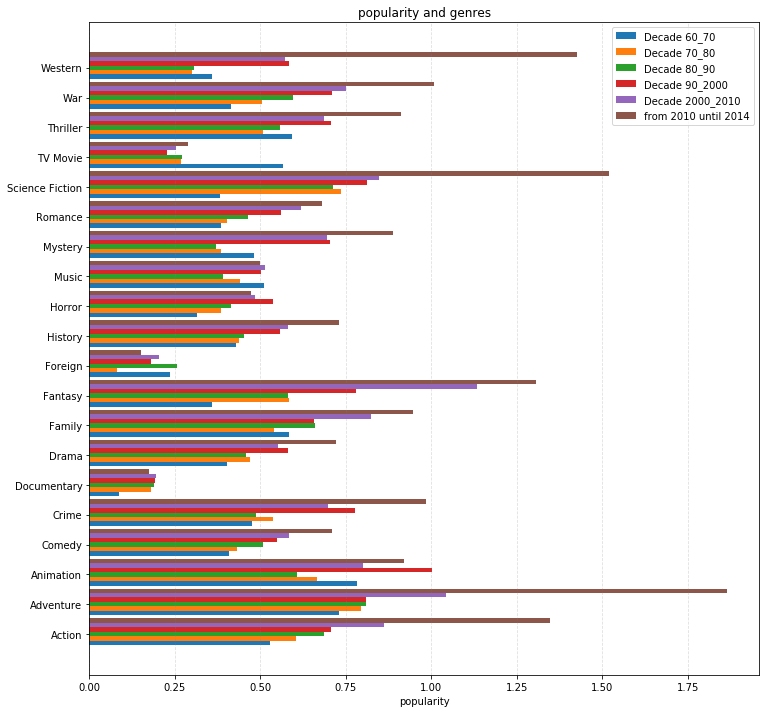

In [122]:
#drowing plot represents genres which are  the most popular from year to year using dataframe slices
%matplotlib inline
labels =df_Q1_EX_decade1['genres'].values
x=nb.arange(len(labels))
width = 0.15
y=df_Q1_EX_decade1['popularity'].values
fig, ax = plt.subplots(figsize=(12, 12))
decade1=ax.barh(x-(2*width),y,width,label='Decade 60_70')
############################################################################################
y2=df_Q1_EX_decade2['popularity'].values
decade2=ax.barh(x-width,y2,width,label='Decade 70_80')
############################################################################################
y3=df_Q1_EX_decade3['popularity'].values
decade3=ax.barh(x,y3,width,label='Decade 80_90')
###########################################################################################
y4=df_Q1_EX_decade4['popularity'].values
decade4=ax.barh(x+width,y4,width,label='Decade 90_2000')
######################################################
y5=df_Q1_EX_decade5['popularity'].values
decade4=ax.barh(x+(2*width),y5,width,label='Decade 2000_2010')
###########################################################
y6=df_Q1_EX_decade6['popularity'].values
decade6=ax.barh(x+(3*width),y6,width,label='from 2010 until 2014')
ax.set_xlabel('popularity')
ax.set_title('popularity and genres')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend(loc='best', fontsize=10)
ax.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)






<font color='green'>My observation form Bar chart :
     that some genres their popularity is increasing significantly over years like science fiction and other with less rate like crime </font>
             

### Research Question 2  (Q2:What kinds of properties are associated with movies that have high revenues?)

In [89]:
# To get movies with highest revenues i took highest 300 Revenues
# df_Q2R data frame relate to question 2
df_Q2R=df_Q2[['revenue','budget_adj','original_title','vote_average']]
df_Q2R=df_Q2R.nlargest(200,['revenue'])
df_Q2R.head(20)

,revenue,budget_adj,original_title,vote_average
1386,2781505847,2.408869e+08,Avatar,7.1
3,2068178225,1.839999e+08,Star Wars: The Force Awakens,7.5
5231,1845034188,2.716921e+08,Titanic,7.3
4361,1519557910,2.089437e+08,The Avengers,7.3
0,1513528810,1.379999e+08,Jurassic World,6.5
4,1506249360,1.747999e+08,Furious 7,7.3
14,1405035767,2.575999e+08,Avengers: Age of Ultron,7.4
3374,1327817822,1.211748e+08,Harry Potter and the Deathly Hallows: Part 2,7.7
5422,1274219009,1.404050e+08,Frozen,7.5
5425,1215439994,1.872067e+08,Iron Man 3,6.9


Text(0.5, 1.02, 'Relation between Revenue and Budget associated with movies that have high Revenues (highest 300)')

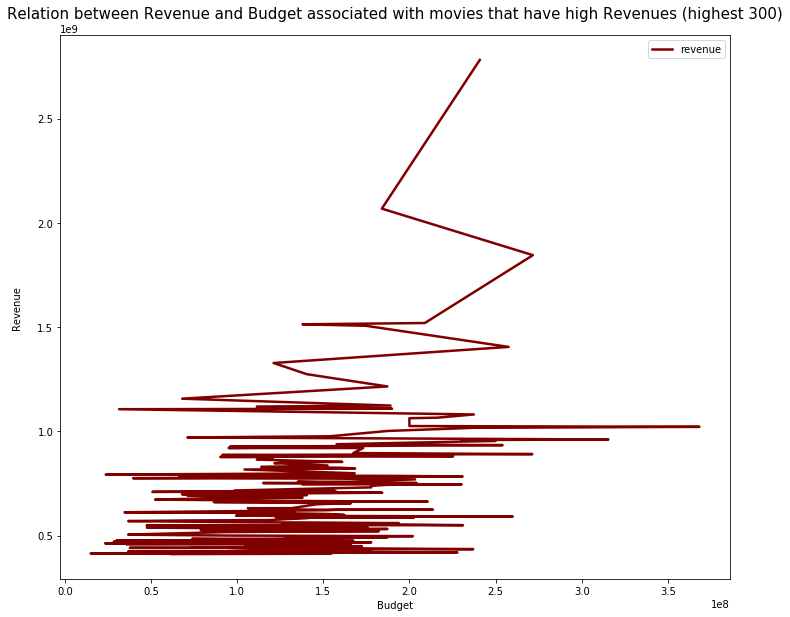

In [123]:
df_Q2R.plot.line(x='budget_adj',y='revenue',figsize=(12, 10), linewidth=2.5, color='maroon')
plt.ylabel("Revenue", labelpad=15)
plt.xlabel("Budget")
plt.title("Relation between Revenue and Budget associated with movies that have high Revenues (highest 300)", y=1.02,fontsize=15)

  >><font color='green'> There is no Correlation between Budget und Revenue</font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F7C4D63548>]],
      dtype=object)

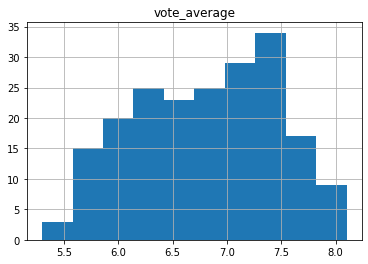

In [91]:
# The graph to vote on the top 300 films in terms of revenue
df_Q2R.hist(column='vote_average')

><font color='green'> most of highest movie revenue have rate 7.5</font>

<a id='conclusions'></a>
## Conclusions

> **Q1**: 
>I used Decades to represent years because it is difficult to visualize 20 genres over 54 year This is in addition to the inflated data size after separating genre column becuse it should that each genere represent isolate from anther to test the change in popularty of this genre over years .

> I think I believe that the number of films produced and the budget allocated to each type annually can contribute to reaching more solid conclusions about the change in popularity.

>** Observation**
>> <ul> 
    <li>Adventure and Sci fiction are the most genres of movie which their popularity increasing from decade to decade</li>
    <li>western movies have wobbling popularity but from 2010 to 2014 thier popularity Is increasing significantly</li> 
    <li>Documentary films are of low and semi-fixed popularit</li>
    </ul>

> **Q2**: 
>I did analysis process on sample of 3855 from 10866 of dataset because I drop all rows without revenue and budget and it is difficult to guess the missing data because for example each movie belong to multi genres so that i cant fill missing data with data from similar genre .so if there are more values in revenue and budget columns i will get better conclusions which result that our visualisations  are restrictive

> Director would be useful in the correlation with higher revenue which result more observation to come to a solid conclusion

>** Observation**
>><ul>
    <li>There are no constant relation between budget and revenue .higher budget doesn't mean necessarily higher revenue</li>
    <li>Most popular films have a majority vote from 7 to 7.5</li>
    </ul>